# **INSTALL LIBRARY**

In [1]:
!pip install split-folders
!pip install kaggle

# **IMPORT LIBRARY**

In [2]:
import os
import cv2
import PIL
import random
import pathlib
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import splitfolders
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")
import tensorflow_datasets as tfds
import tensorflow as tf
from itertools import chain
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

import tensorflow_hub as hub

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

# **IMPORT DATA**

In [3]:
!kaggle datasets download -d arghianfaizalyusup/dataset-penyakit-kulit

Streaming output truncated to the last 5000 lines.
  inflating: /content/33k-skin-disease-data-set/train/Tinea Ringworm Candidiasis and other Fungal Infections/t-tinea-foot-webs-18_jpg.rf.9fb71e1aa4b75253f30b188711043dcb.jpg  
  inflating: /content/33k-skin-disease-data-set/train/Tinea Ringworm Candidiasis and other Fungal Infections/t-tinea-foot-webs-18_jpg.rf.acba9efce397f91ca57e80262bd5a82f.jpg  
  inflating: /content/33k-skin-disease-data-set/train/Tinea Ringworm Candidiasis and other Fungal Infections/t-tinea-foot-webs-19_jpg.rf.b24f762d098486c7efeab4ed453301b9.jpg  
  inflating: /content/33k-skin-disease-data-set/train/Tinea Ringworm Candidiasis and other Fungal Infections/t-tinea-foot-webs-19_jpg.rf.ca576a6d47e992f50a7fa7affb2ea342.jpg  
  inflating: /content/33k-skin-disease-data-set/train/Tinea Ringworm Candidiasis and other Fungal Infections/t-tinea-foot-webs-21_jpg.rf.29ca022ebe0cebe7e3e7ac4e68a2b32b.jpg  
  inflating: /content/33k-skin-disease-data-set/train/Tinea Ringworm 

In [ ]:
path = '/content/dataset-penyakit-kulit/Dataset'
print(os.listdir(path))

['Warts Molluscum and other Viral Infections', 'Psoriasis pictures Lichen Planus and related diseases', 'Cutaneous Larva Migrans', 'Lupus and other Connective Tissue diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Nail Fungus', 'Cellulitis Impetigo and other Bacterial Infections', 'Vasculitis', 'Vascular Tumors', 'Chickenpox', 'Athlete Foot', 'Poison Ivy Photos and other Contact Dermatitis', 'Eczema', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Impetigo', 'Acne and Rosacea Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs', 'Light Diseases and Disorders of Pigmentation', 'Systemic Disease', 'Shingles', 'Atopic Dermatitis', 'Ringworm', 'Urticaria Hives', 'Melanoma Skin Cancer Nevi and Moles']


# **SPLITTING DATA**

In [ ]:
splitfolders.ratio(path, output="Penyakit1", ratio=(0.9, 0, 0.1))

Copying files: 4093 files [00:02, 1939.68 files/s]


In [ ]:
train_dir = '/content/Penyakit1/train'
test_dir = '/content/Penyakit1/test'

data_dir = '/content/Penyakit1/'

In [ ]:
num_test_images = len(os.listdir(test_dir))
num_train_images = len(os.listdir(train_dir))
print(f'Number of test images: {num_test_images}')
print(f'Number of train images: {num_train_images}')

class_names = sorted(os.listdir(test_dir))
num_classes = len(class_names)

class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)


img_size = (192, 192, 3)
print('classes: ', class_names)

Number of test images: 26
Number of train images: 26
classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Athlete Foot', 'Atopic Dermatitis', 'Cellulitis Impetigo and other Bacterial Infections', 'Chickenpox', 'Cutaneous Larva Migrans', 'Eczema', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs', 'Impetigo', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Ringworm', 'Seborrheic Keratoses and other Benign Tumors', 'Shingles', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis', 'Warts Molluscum and other Viral Infections']


# **MODEL**

**Visualizing the results**

In [ ]:
# Defining data generator withour Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(data_dir,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'categorical')
val_data = data_gen.flow_from_directory(data_dir,
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'categorical')

Found 3274 images belonging to 3 classes.
Found 818 images belonging to 3 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [ ]:
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """

    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (15, 10))

    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()
    plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

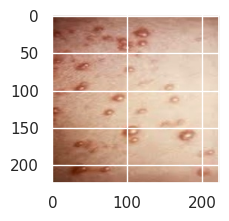

In [ ]:
plot_random_images()

**Baseline Model**

In [ ]:
tf.random.set_seed(42)
model_1 = Sequential([
    Input(shape = (224, 224, 3)), # Input layer
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), # First Convolutional layer
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), # Second Convolutional layer
    Flatten(),
    Dense(1, activation = 'sigmoid') # Output layer
])

model_1.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs= 15,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/15
103/103 [==============================] - 266s 3s/step - loss: 1.7617 - accuracy: 0.6440 - val_loss: 0.6415 - val_accuracy: 0.6667
Epoch 2/15
103/103 [==============================] - 257s 2s/step - loss: 0.6378 - accuracy: 0.6667 - val_loss: 0.6369 - val_accuracy: 0.6667
Epoch 3/15
103/103 [==============================] - 272s 3s/step - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 4/15
103/103 [==============================] - 263s 3s/step - loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 5/15
103/103 [==============================] - 276s 3s/step - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 6/15
103/103 [==============================] - 269s 3s/step - loss: 0.6367 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 7/15
103/103 [==============================] - 257s 2s/step - loss: 0.6367 - accuracy: 0.6667 - val_loss: 0.6371 - val_accuracy: 0.6667

In [ ]:
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 5))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = accuracy, label='Training Accuracy', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_accuracy, label='Validation Accuracy', ax=ax[1])
    ax2.set(title = 'Accuracy', xlabel = 'Epochs')

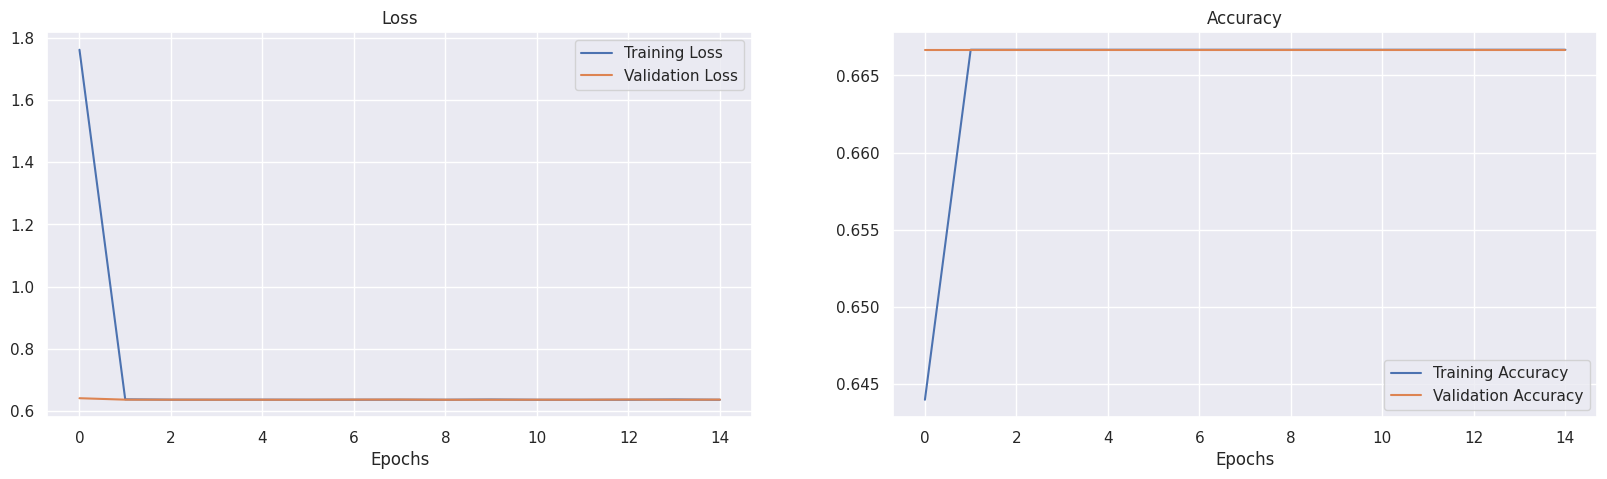

In [ ]:
plot_loss_curves(history_1)

**Max Pooling Layer**

In [ ]:
model_2 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
     MaxPool2D(pool_size = 2),# It will reduce the number of features by half
    Conv2D(filters = 32, kernel_size =2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs= 15,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/15
103/103 [==============================] - 179s 2s/step - loss: 0.6879 - accuracy: 0.6473 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 2/15
103/103 [==============================] - 172s 2s/step - loss: 0.6370 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 3/15
103/103 [==============================] - 170s 2s/step - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 4/15
103/103 [==============================] - 168s 2s/step - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 5/15
103/103 [==============================] - 174s 2s/step - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 6/15
103/103 [==============================] - 171s 2s/step - loss: 0.6365 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 7/15
103/103 [==============================] - 171s 2s/step - loss: 0.6365 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667

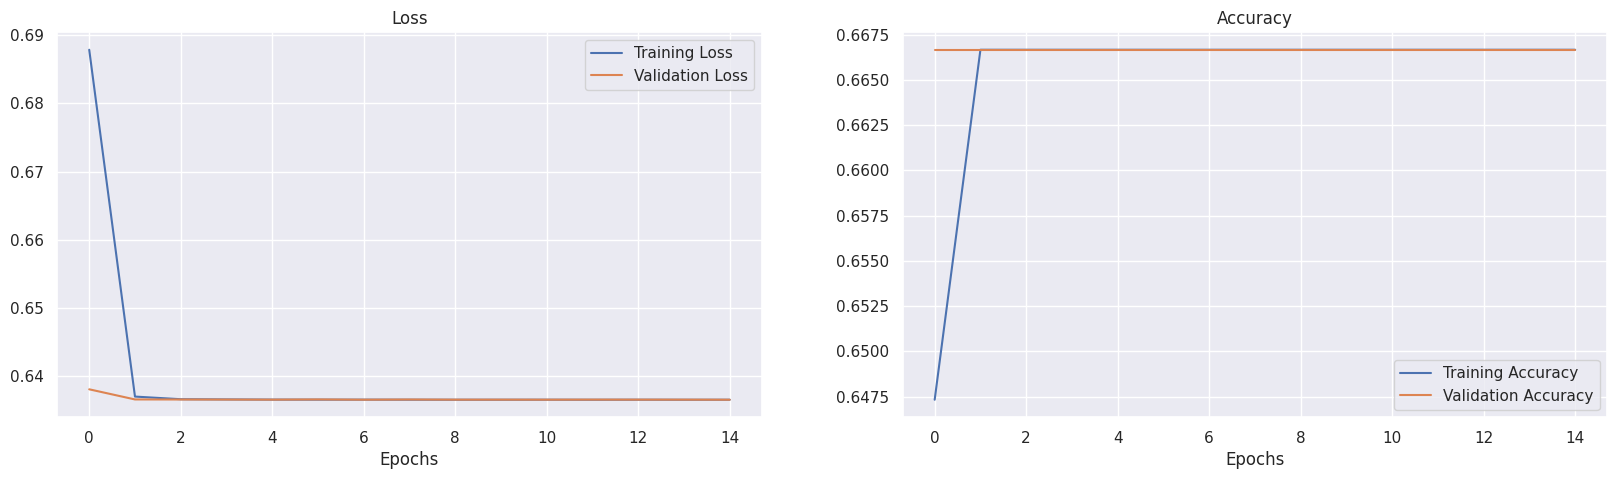

In [ ]:
plot_loss_curves(history_2)

**Data Augmentation**

In [ ]:
data_gen_augmented = ImageDataGenerator(rescale = 1/255.,
                                        validation_split = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip= True,
                                        rotation_range = 20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2)

print('Augmented training Images:')
train_data_augmented = data_gen_augmented.flow_from_directory(data_dir,
                                                              target_size = (224, 224),
                                                              batch_size = 32,
                                                              subset = 'training',
                                                              class_mode = 'categorical')

print('Unchanged Validation Images:')
val_data = data_gen.flow_from_directory(data_dir,
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'categorical')

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
model_3 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data_augmented, # changing the training data
                        epochs= 15,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/15
103/103 [==============================] - 219s 2s/step - loss: 0.3708 - accuracy: 0.8971 - val_loss: 0.3568 - val_accuracy: 0.8973
Epoch 2/15
103/103 [==============================] - 211s 2s/step - loss: 0.3445 - accuracy: 0.8971 - val_loss: 0.3334 - val_accuracy: 0.8973
Epoch 3/15
103/103 [==============================] - 209s 2s/step - loss: 0.3416 - accuracy: 0.8971 - val_loss: 0.3563 - val_accuracy: 0.8973
Epoch 4/15
103/103 [==============================] - 205s 2s/step - loss: 0.3404 - accuracy: 0.8971 - val_loss: 0.3358 - val_accuracy: 0.8973
Epoch 5/15
103/103 [==============================] - 211s 2s/step - loss: 0.3369 - accuracy: 0.8971 - val_loss: 0.3317 - val_accuracy: 0.8973
Epoch 6/15
103/103 [==============================] - 205s 2s/step - loss: 0.3388 - accuracy: 0.8971 - val_loss: 0.3454 - val_accuracy: 0.8973
Epoch 7/15
103/103 [==============================] - 205s 2s/step - loss: 0.3384 - accuracy: 0.8971 - val_loss: 0.3326 - val_accuracy: 0.8973

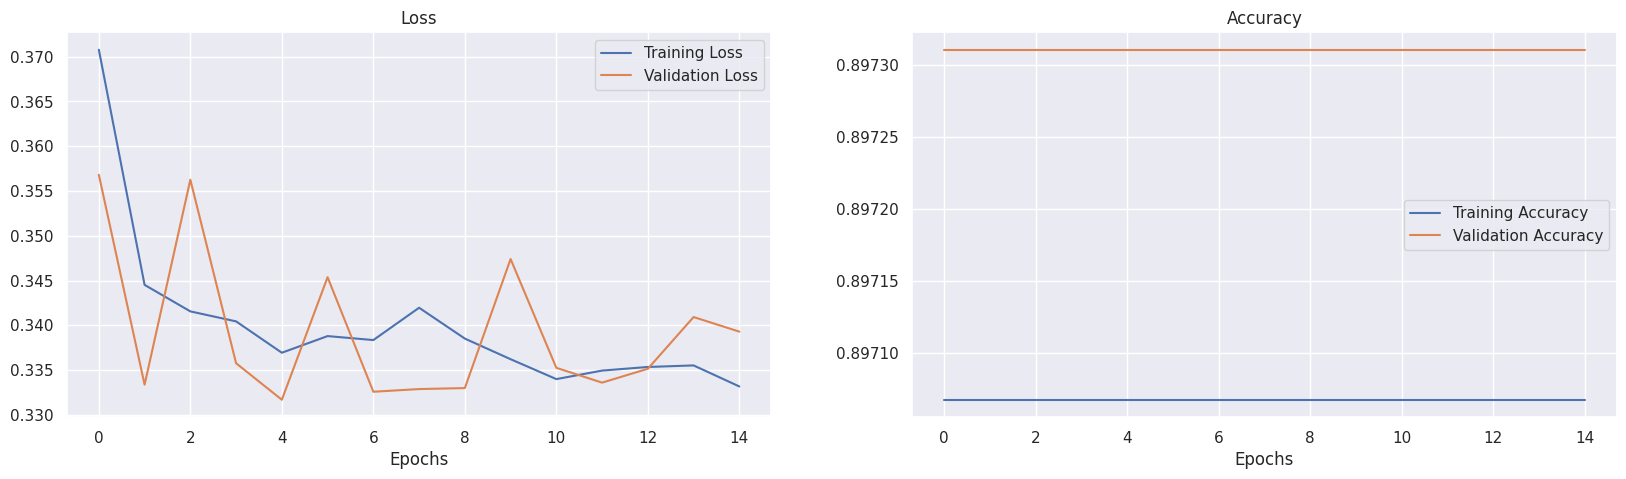

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.save("model_3.h5")

**Transfer Learning**

In [ ]:
url = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'

feature_extractor_layer = hub.KerasLayer(url,
                                         trainable=False,
                                         input_shape=(224, 224, 3))

model_5 = Sequential([
    feature_extractor_layer,
    Dense(1, activation = 'sigmoid')
])

model_5.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs= 10,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Exception ignored in: <function _xla_gc_callback at 0x79120e73ab00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


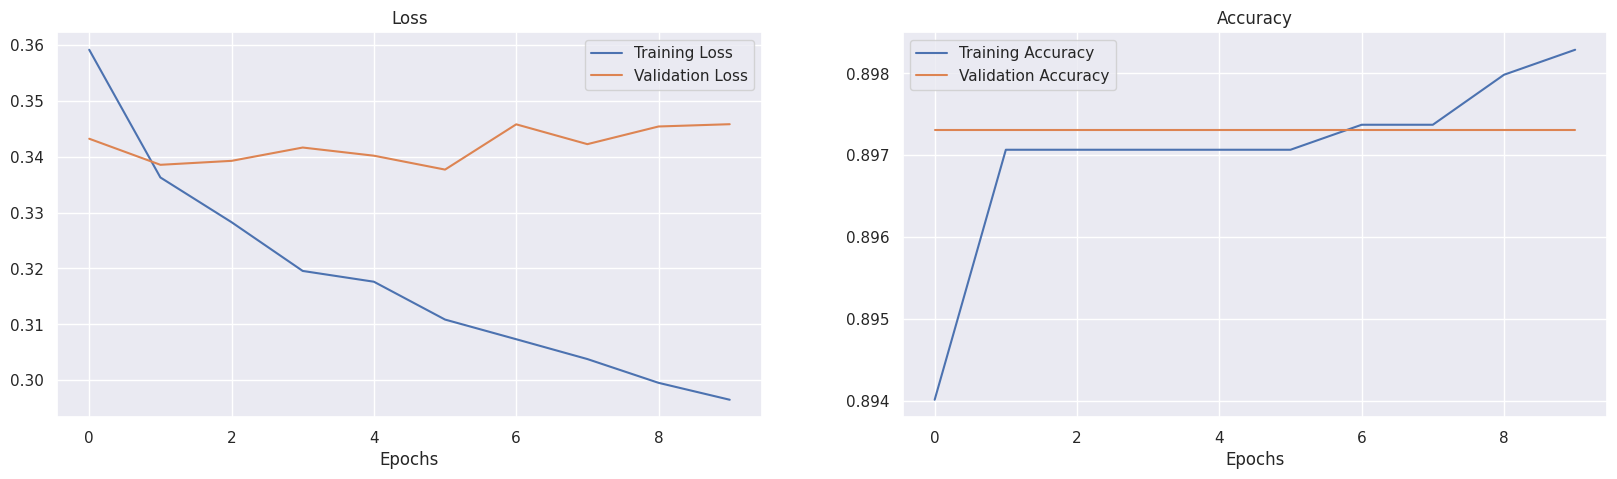

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_5.save("model_5.h5")

In [ ]:
from google.colab import files
files.download("model_5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install tensorflow-contrib

ERROR: Could not find a version that satisfies the requirement tensorflow-contrib (from versions: none)
ERROR: No matching distribution found for tensorflow-contrib


In [ ]:
# Load weights from h5 file.
model_3.load_weights('model_3.h5')

In [ ]:
# Print summary.
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 96800)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
import tensorflow as tf

# Step 1: Load the Keras model from the .h5 file
model = tf.keras.models.load_model('model_3.h5')

# Step 2: Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Step 3: Save the converted .tflite model to a file
with open('/content/model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Install necessary libraries
!pip install tensorflowjs
!pip install gdown

import gdown
import shutil
from google.colab import files

# ID file dari link berbagi Google Drive
file_id = '13jOqADOn5HxfaIl6OS9J3qY8wRyoJ8Gm'  # ganti dengan ID file Anda
# Output file path
output_h5 = 'model.h5'

# Download file dari Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_h5, quiet=False)

# Konversi model .h5 menjadi format TensorFlow.js
!tensorflowjs_converter --input_format keras model.h5 model_tfjs

# Path to the directory containing the converted TensorFlow.js model
model_tfjs_directory = "model_tfjs"

# Path for the output zip file
output_zip_path = "model_tfjs.zip"

# Creating a zip file from the model_tfjs directory
shutil.make_archive(output_zip_path.replace('.zip', ''), 'zip', model_tfjs_directory)

# Unduh file zip
files.download(output_zip_path)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

Downloading...
From (original): https://drive.google.com/uc?id=13jOqADOn5HxfaIl6OS9J3qY8wRyoJ8Gm
From (redirected): https://drive.google.com/uc?id=13jOqADOn5HxfaIl6OS9J3qY8wRyoJ8Gm&confirm=t&uuid=f895399b-daff-4787-827c-bb19bde82521
To: /content/model.h5
100%|██████████| 257M/257M [00:04<00:00, 61.0MB/s]


2024-06-09 14:52:29.802171: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 14:52:31.071429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 963, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 949, in convert
    _dispatch_converter(input_format, output_fo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>